In [1]:
# general packages
import numpy as np
import pandas as pd
import torch
from scipy.sparse import issparse

# velocity packages
import scanpy as sc
import scvelo as scv
import anndata as ann

# plotting packages
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm, trange
from IPython.display import clear_output


In [2]:
# script specific imports
import os
import scipy as sp

In [3]:
home = '/nemo/lab/briscoej/home/users/maizelr/transcriptomics/SVM23/input_data/DE_data/'

In [5]:
os.listdir(home)

days = ['D4','D8']
cons = ['200uM','500uM','650uM','800uM','2000uM']
reps = ['1','2']

In [15]:
file = home+'_'.join((days[0],cons[0],reps[0]))+'.csv'

In [65]:
res_dict = {}
for i, con in enumerate(cons):
    res = []
    for day in days:
        for rep in reps:
            file = home+'_'.join((day,con,rep))+'.csv'
            data = pd.read_csv(file, index_col='Unnamed: 0')
            res.append(sum(data.padj<0.05))
    res_dict[con] = res


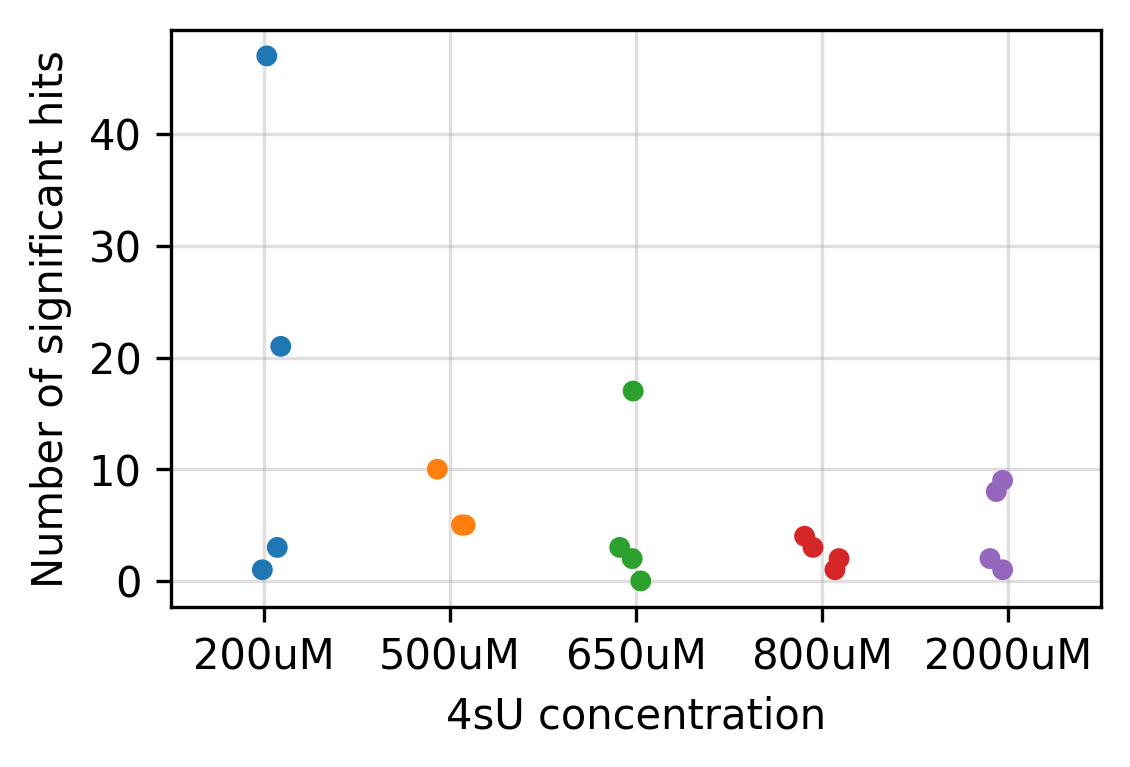

In [66]:
plt.figure(figsize=(4,2.5), dpi=300)
sns.stripplot(pd.DataFrame(res_dict), jitter=0.1)
plt.xlabel("4sU concentration")
plt.ylabel("Number of significant hits")
plt.grid(alpha=0.4)
plt.savefig("7_rnaseq1.png", bbox_inches='tight')
plt.show()

In [6]:
res_dict = {}
for i, con in enumerate(cons):
    res = []
    for day in days:
        hits = []
        for rep in reps:
            file = home+'_'.join((day,con,rep))+'.csv'
            data = pd.read_csv(file, index_col='Unnamed: 0')
            hits.append(list(data[data.padj<0.05].index))
        res_dict[f"{con}_{day}"] = hits
            


In [7]:
file = home+'_'.join((days[0],cons[0],reps[0]))+'.csv'
data = pd.read_csv(file, index_col='Unnamed: 0')

In [8]:
from matplotlib_venn import venn2

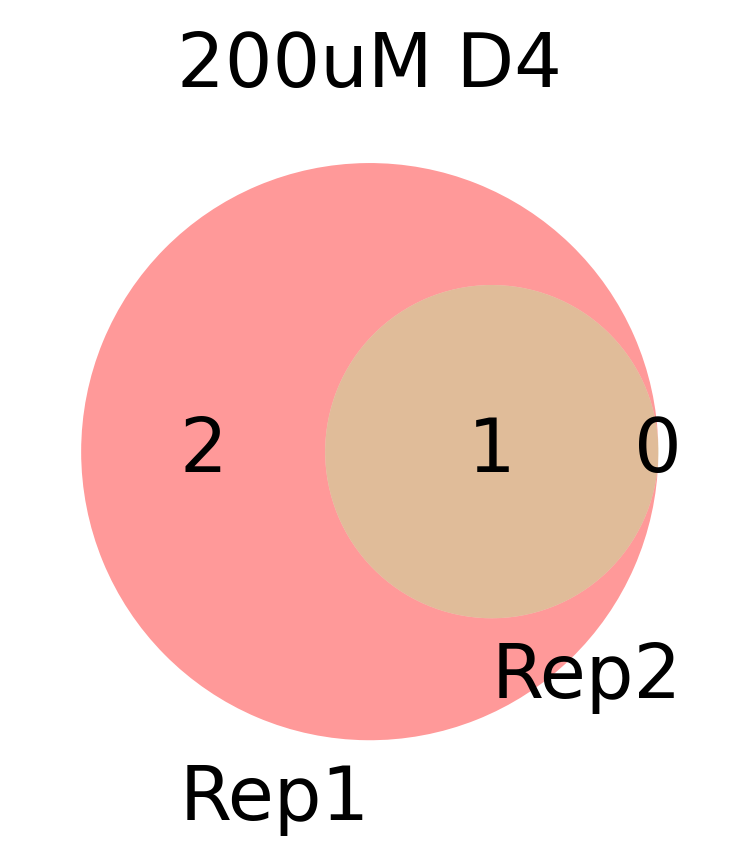

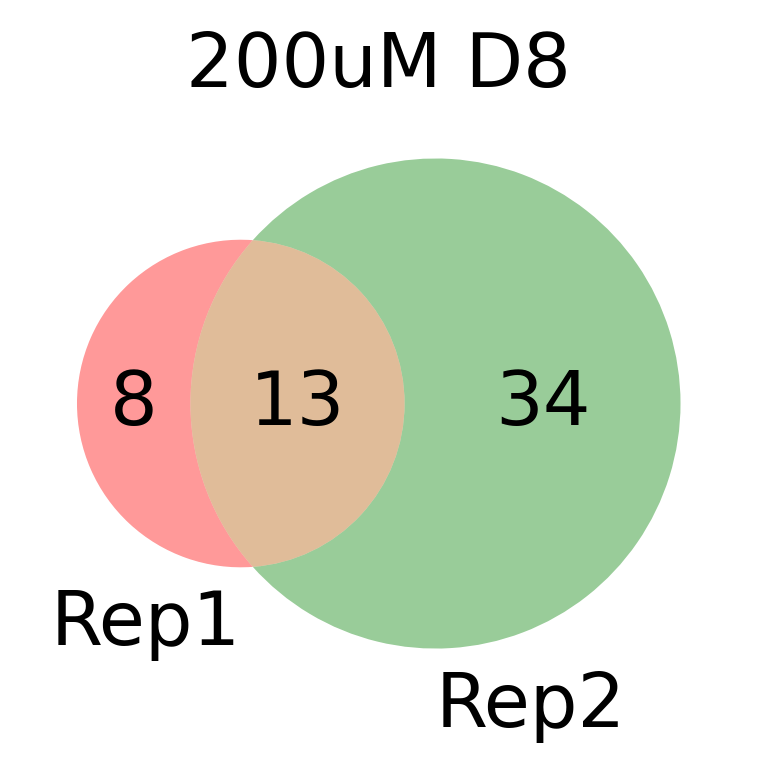

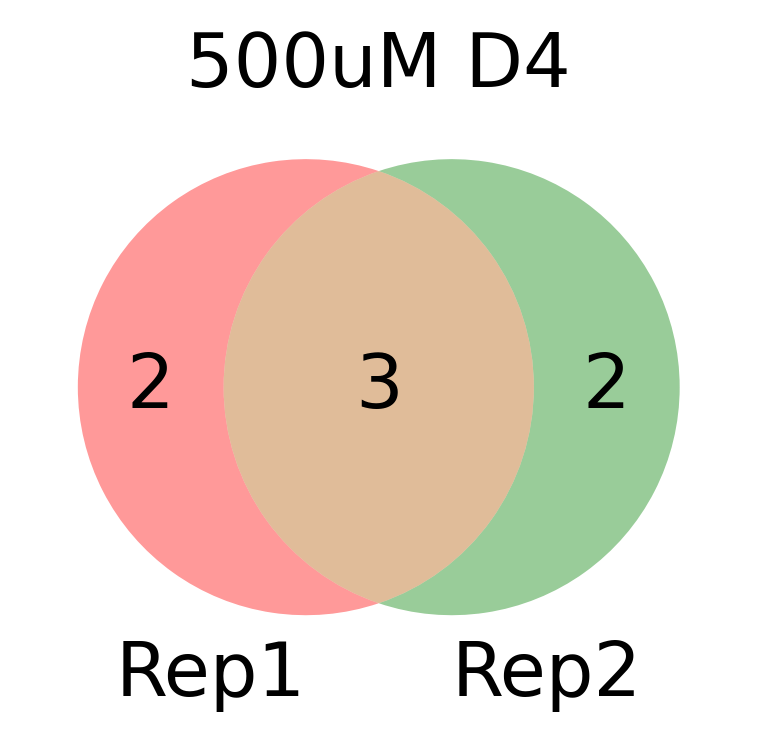

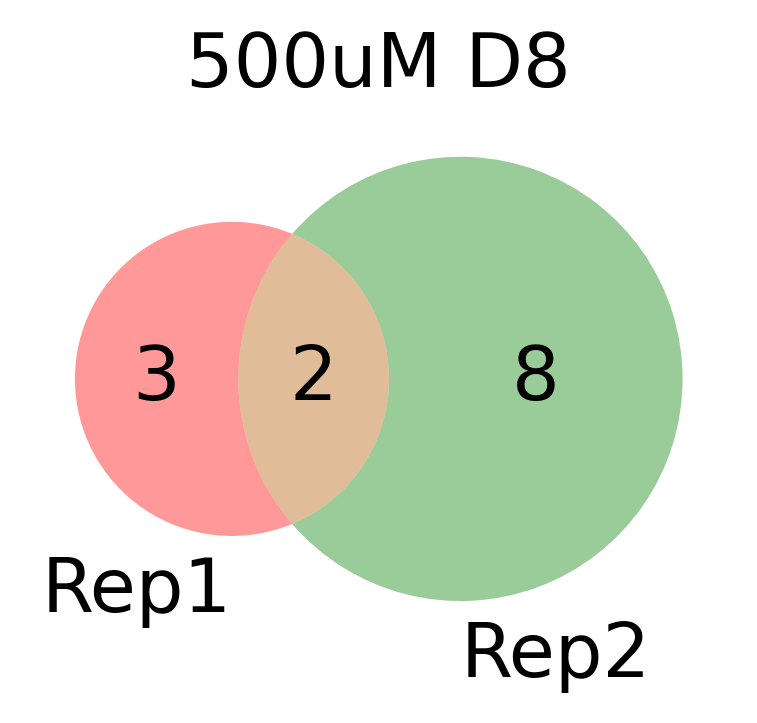

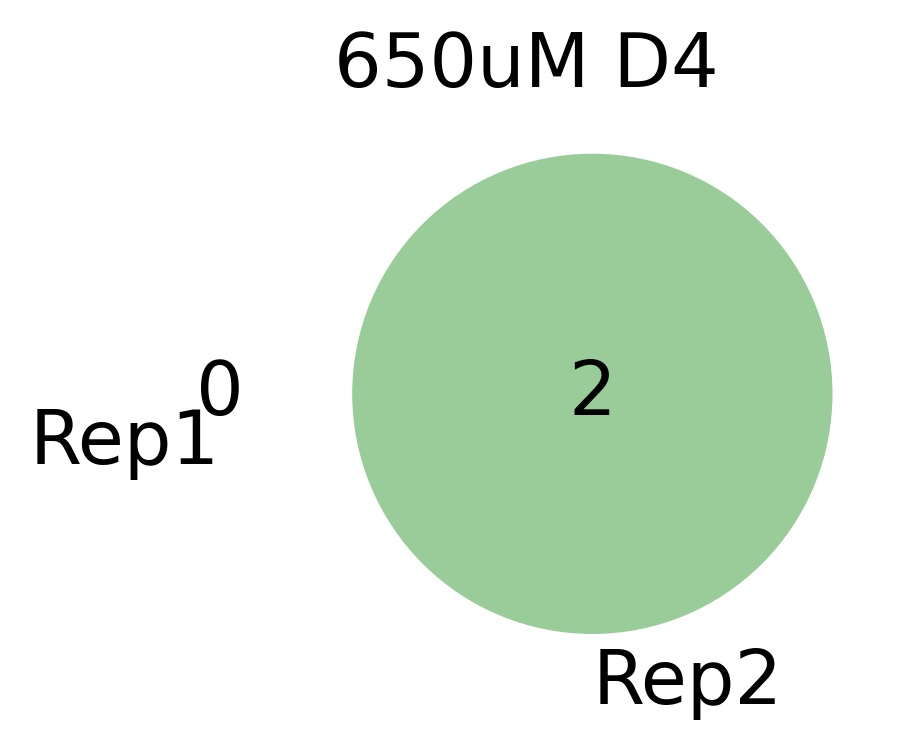

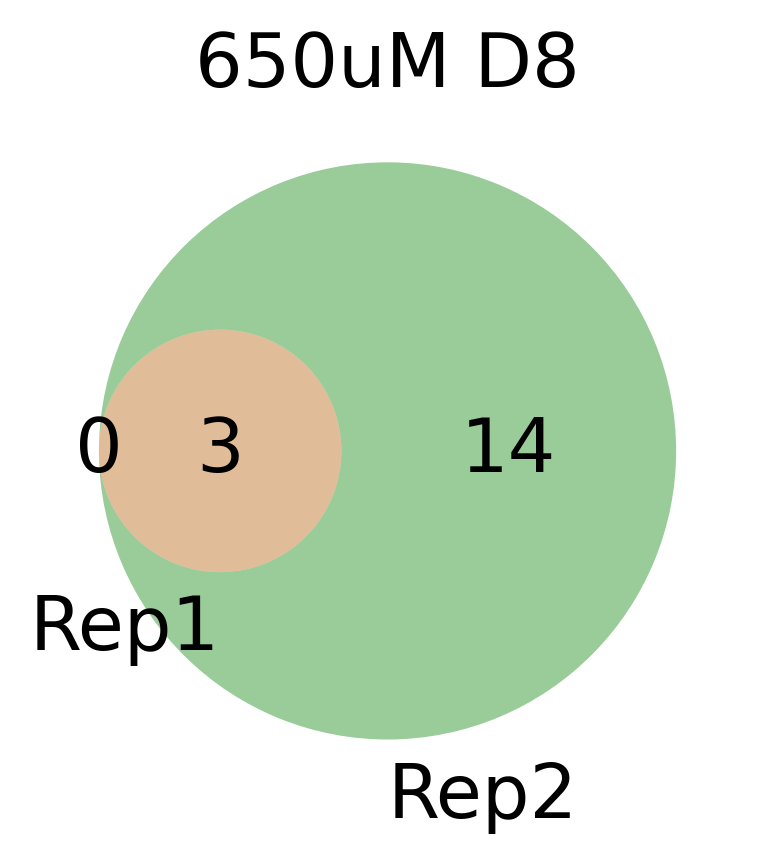

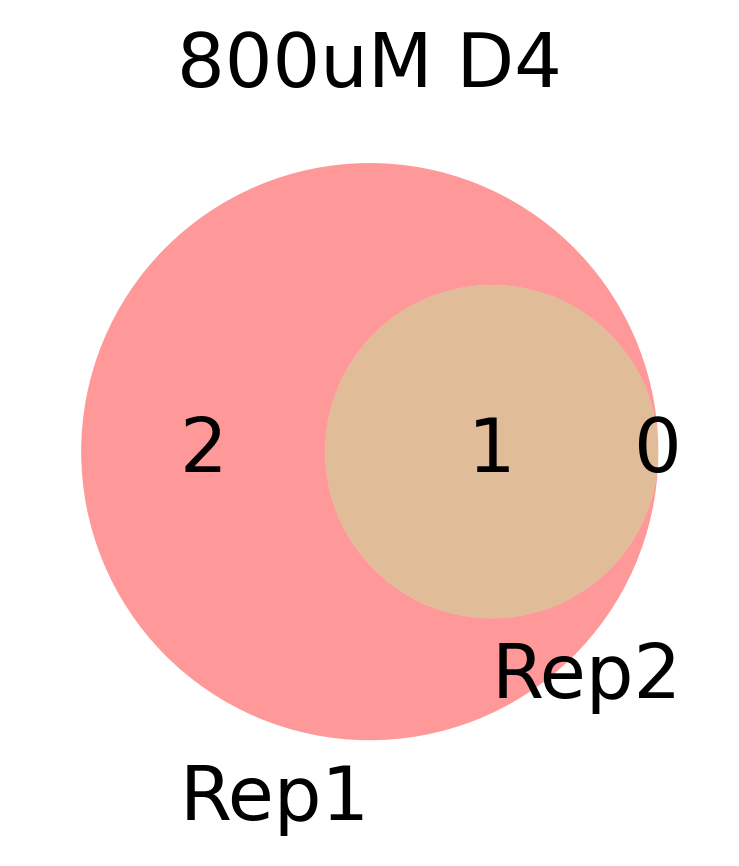

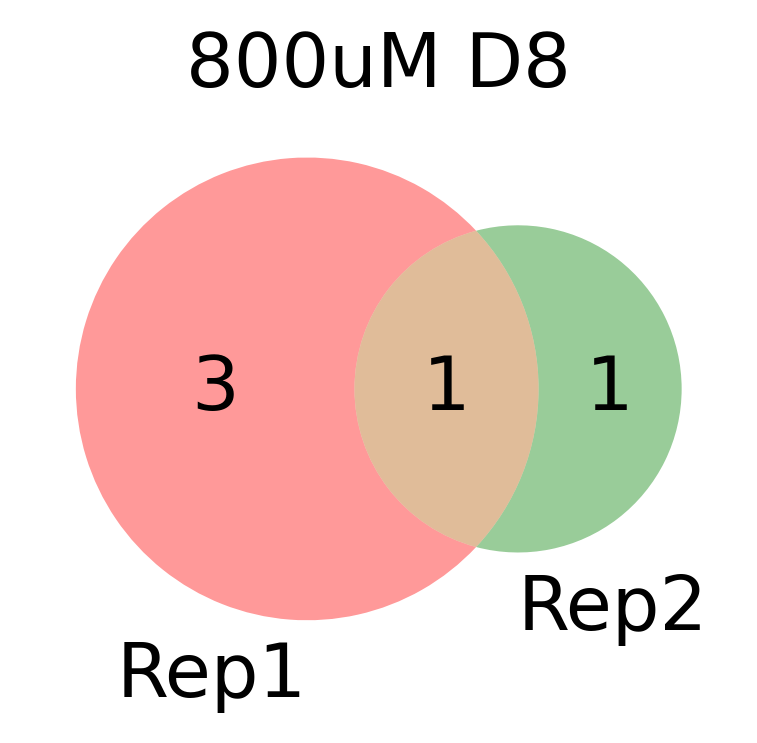

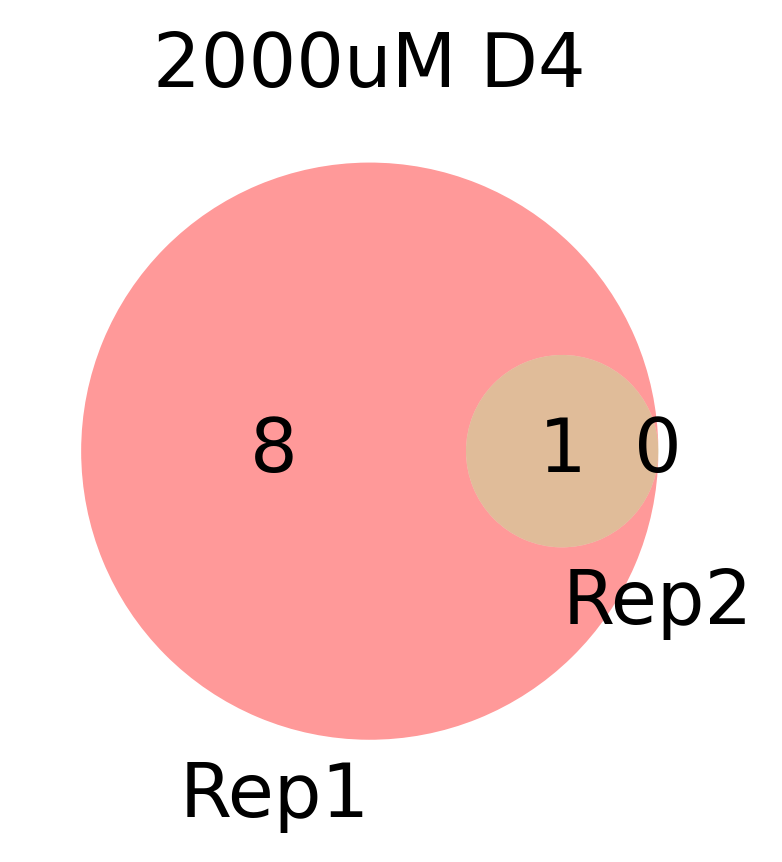

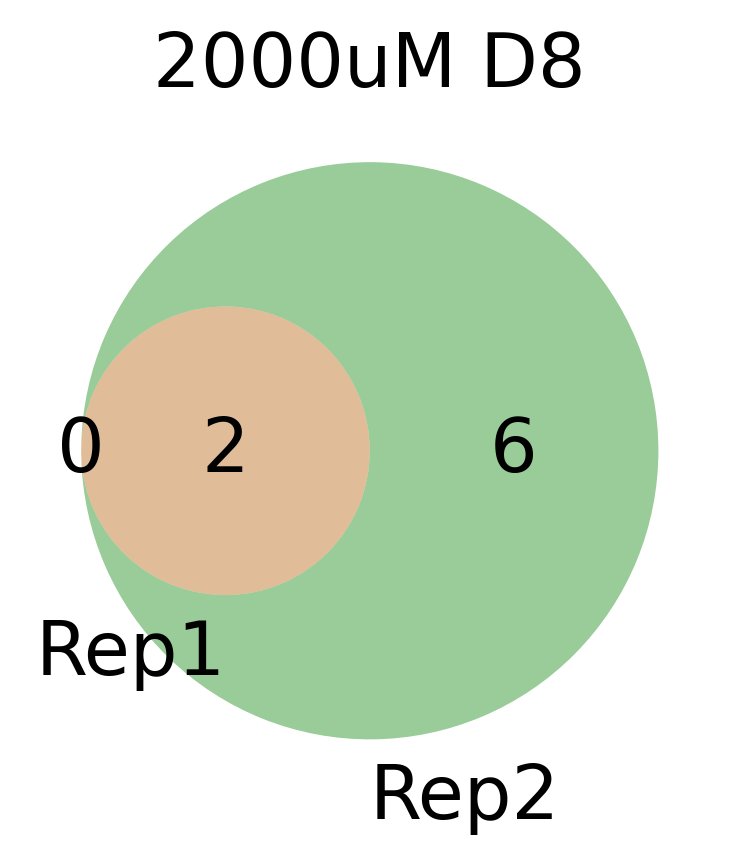

In [61]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

for name, item in res_dict.items():
    plt.figure(figsize=(3,3),dpi=300)
    v = venn2([set(item[0]), set(item[1])], set_labels=['Rep1', 'Rep2'])
    plt.title(name.replace('_', ' '), fontsize=18)
    
    # Adjust font size for set labels
    for text in v.set_labels:
        if text:  # check if the label is not None
            text.set_fontsize(18)
    
    # Corrected: Adjust font size for the numbers in each circle/intersection
    for label in v.subset_labels:
        if label:  # check if the label is not None
            label.set_fontsize(18)
    plt.savefig(f'7rna_{name}.png')
    plt.show()
